<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_date  500 non-null    datetime64[ns]
 1   region      500 non-null    object        
 2   category    500 non-null    object        
 3   sales       500 non-null    float64       
 4   quantity    500 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 19.7+ KB


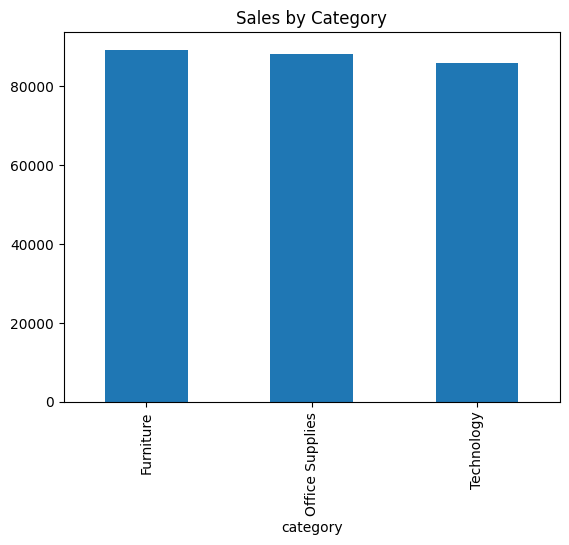

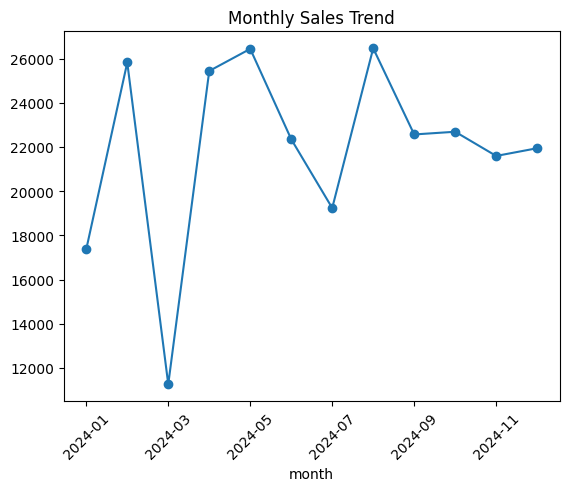

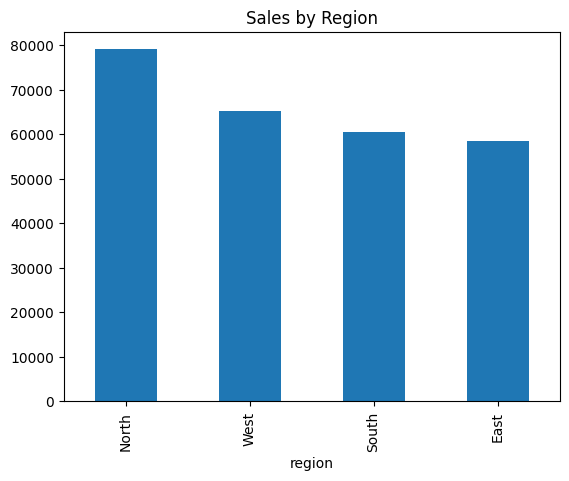

In [17]:
import pandas as pd
import numpy as np

np.random.seed(42)

dates = pd.date_range(start="2024-01-01", end="2024-12-31", freq="D")

data = {
    "order_date": np.random.choice(dates, 500),
    "region": np.random.choice(["North", "South", "East", "West"], 500),
    "category": np.random.choice(["Technology", "Furniture", "Office Supplies"], 500),
    "sales": np.round(np.random.uniform(50, 1000, 500), 2),
    "quantity": np.random.randint(1, 10, 500)
}

df = pd.DataFrame(data)

df.head()
df.info()
df.describe()
# تأكد من نوع التاريخ
df["order_date"] = pd.to_datetime(df["order_date"])

# KPI 1: Total Sales
total_sales = df["sales"].sum()

# KPI 2: Average Order Value
avg_order_value = df["sales"].mean()


sales_by_category = (
    df.groupby("category")["sales"]
    .sum()
    .sort_values(ascending=False)
)

sales_by_category


import matplotlib.pyplot as plt

sales_by_category.plot(kind="bar", title="Sales by Category")
plt.show()

df["month"] = df["order_date"].dt.to_period("M").astype(str)

monthly_sales = df.groupby("month")["sales"].sum()

monthly_sales.head(), monthly_sales.tail()


import matplotlib.pyplot as plt

monthly_sales.plot(kind="line", title="Monthly Sales Trend", marker="o")
plt.xticks(rotation=45)
plt.show()


best_month = monthly_sales.idxmax()
worst_month = monthly_sales.idxmin()

best_month, monthly_sales[best_month], worst_month, monthly_sales[worst_month]


sales_by_region = df.groupby("region")["sales"].sum().sort_values(ascending=False)
sales_by_region


import matplotlib.pyplot as plt

sales_by_region.plot(kind="bar", title="Sales by Region")
plt.show()

# Insights & Recommendations

# The highest sales come from the highest-performing region.
# The lowest sales are observed in the lowest-performing region.

# Recommendation:
# - Focus marketing and inventory efforts on high-performing regions.
# - Investigate low-performing regions for pricing, demand, or distribution issues.





## Insights & Recommendations

- Sales are strongest in the top-performing region.
- Sales are weakest in the lowest-performing region.

**Recommendations:**
- Allocate more marketing budget and inventory to high-performing regions.
- Analyze pricing, demand, and distribution challenges in underperforming regions.
